# Introducción a la Visión computacional

## ¿Qué es la Visión computacional?

La visión computacional es un campo interdisciplinario que estudia el cómo proveer a los computadores de las mismas capacidades visuales que poseemos los humanos. Como disciplina científica, se preocupa de construir la base teórica que permite a los sistemas artificiales extraer información a partir de imágenes.

Se dice que es un campo interdisciplinario pues surge a partir de la interacción de múltiples disciplinas tales como Procesamiento de imágenes, Ciencias de la Computación, Física y Matemáticas.

![Image of Computer Vision](figures/computer vision venn diagram.jpg)

Un sistema de visión computacional transforma un dato no estructurado y en uno estructurado uqe permita tomar decisiones. Las principales etapas asociadas al procesamiento de una imagen digital son las siguientes,

1. Adquisición
2. Procesamiento
3. Análisis
4. Entendimiento
5. Generación de información

## Aplicaciones

- Inspeción automática (e.g. fábrica de botellas)
- Asistencia en tareas de identificación (e.g. identificación de plantas)
- Detección de eventos (e.g. vigilancia con cámaras)
- Navegación (e.g. automóviles autónomos)

## Tareas

- Detección y reconocimiento de objetos
- Análisis de movimiento

## **1. Usando el paquete scikit-image**

Scikit-image es el paquete más usado de Python para leer y procesar imágenes. Se puede importar usando el commando
**`import skimage`**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

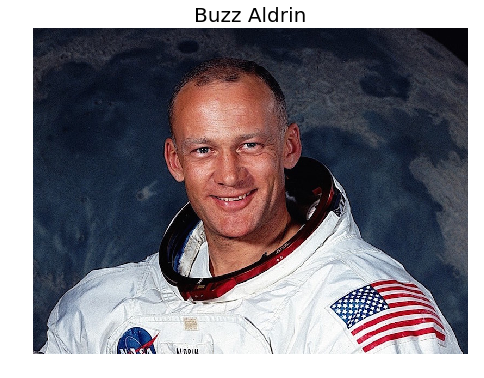

In [5]:
im_file='data/buzz_aldrin.jpg'
im = io.imread(im_file)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im)
ax.axis('off')
ax.set_title('Buzz Aldrin', fontsize=20)

Las dimensiones de la imagen se pueden imprimir usando el metodo shape del objeto im. El primer elemento es el tamaño en el eje Y, el segundo en el eje X y el tercero el numero de canales.

In [4]:
print("Image number of channels: ",im.ndim)
print("Image dimensions: ",im.shape)

Image number of channels:  3
Image dimensions:  (600, 800, 3)


In [7]:
from skimage import exposure

def iter_channels(color_image):
    """Yield color channels of an image."""
    # Roll array-axis so that we iterate over the color channels of an image.
    for channel in np.rollaxis(color_image, -1):
        yield channel

def plot_histogram(image, ax=None, **kwargs):
    """ Plot the histogram of an image (gray-scale or RGB) on `ax`.
    Calculate histogram using `skimage.exposure.histogram` and plot as filled
    line. If an image has a 3rd dimension, assume it's RGB and plot each
    channel separately.
    """
    ax = ax if ax is not None else plt.gca()

    if image.ndim == 2:
        _plot_histogram(ax, image, color='black', **kwargs)
    elif image.ndim == 3:
        # `channel` is the red, green, or blue channel of the image.
        for channel, channel_color in zip(iter_channels(image), 'rgb'):
            _plot_histogram(ax, channel, color=channel_color, **kwargs)


def _plot_histogram(ax, image, alpha=0.3, **kwargs):
    # Use skimage's histogram function which has nice defaults for
    # integer and float images.
    hist, bin_centers = exposure.histogram(image)
    ax.fill_between(bin_centers, hist, alpha=alpha, **kwargs)
    ax.set_xlabel('intensity')
    ax.set_ylabel('# pixels')

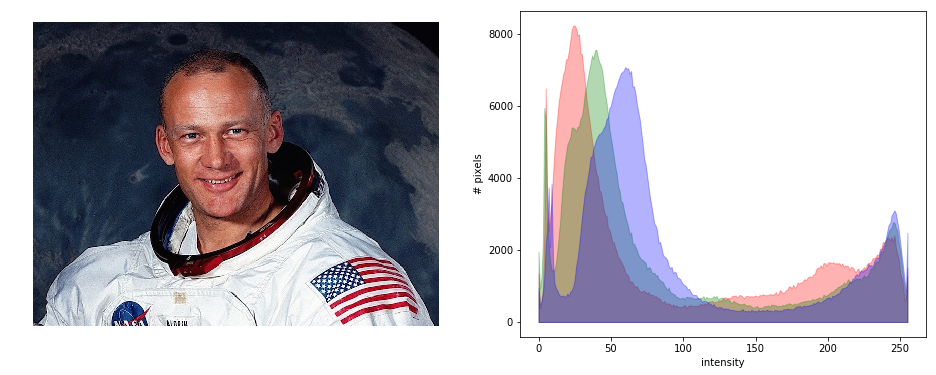

In [8]:
fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*8, 6))

ax_image.imshow(im)
ax_image.axis('off')
plot_histogram(im, ax=ax_hist)

Usamos el método adjust_gamma() para ajustar el brillo de la imagen

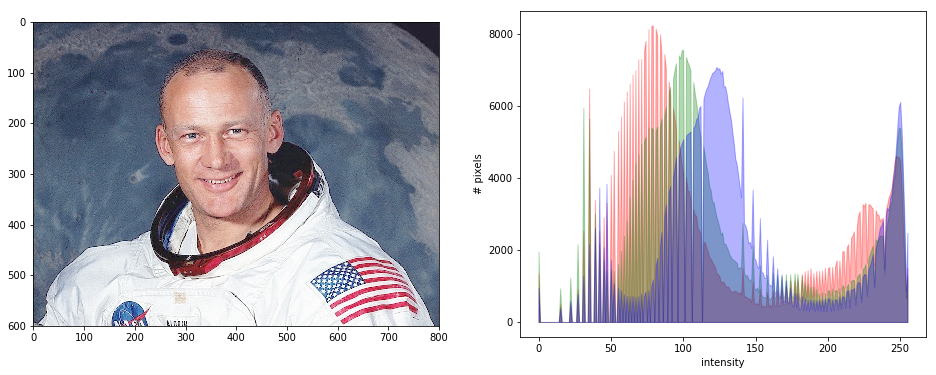

In [9]:
im_bright = exposure.adjust_gamma(im, gamma=0.5, gain=1)

fig, (ax_image, ax_hist) = plt.subplots(ncols=2, figsize=(2*8, 6))

ax_image.imshow(im_bright)
plot_histogram(im_bright, ax=ax_hist)

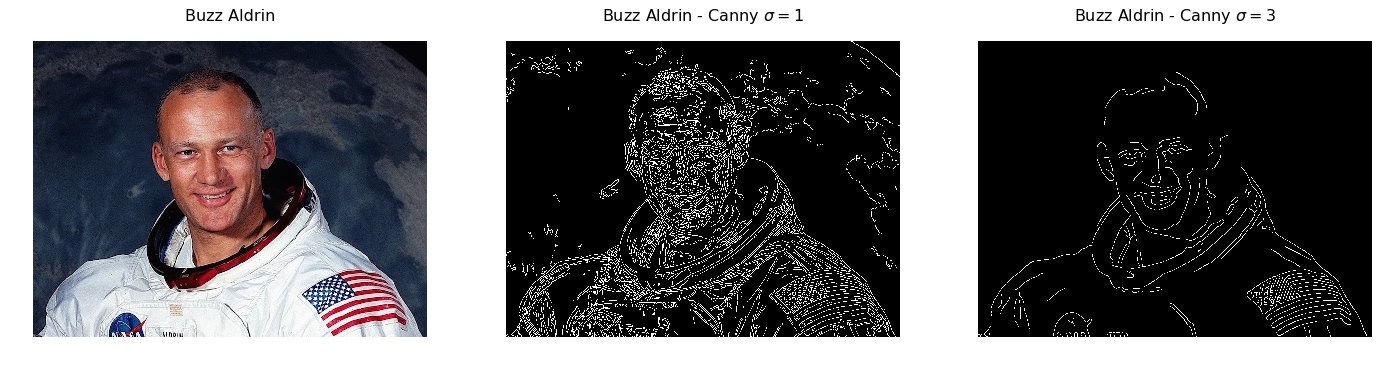

In [10]:
from skimage.color import rgb2gray
from skimage import feature

im_gray = rgb2gray(im)

edges1 = feature.canny(im_gray)
edges2 = feature.canny(im_gray, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6),
                                    sharex=True, sharey=True)

ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Buzz Aldrin', fontsize=16)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Buzz Aldrin - Canny $\sigma=1$', fontsize=16)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Buzz Aldrin - Canny $\sigma=3$', fontsize=16)

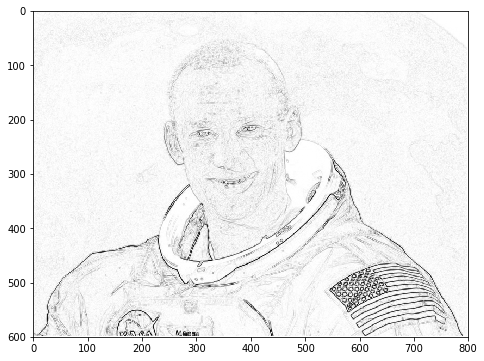

In [11]:
from skimage.exposure import rescale_intensity
from skimage.color.adapt_rgb import adapt_rgb
from skimage import filters
from skimage.color import rgb2gray

def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(rescale_intensity(1 - sobel_gray(im)), cmap=plt.cm.gray)

## **2. Usando la librería opencv**

OpenCV es la librería de visión computacional más usada por la comunidad. La versión estable más reciente corresponde a la 3.2.0 y puede ser descargada desde el repositorio en [Github](https://github.com/opencv/opencv).

- https://github.com/opencv/opencv
- https://github.com/jrosebr1/imutils

In [21]:
import cv2
import imutils
from imutils.object_detection import non_max_suppression

print('OpenCV version: ', cv2.__version__)
print('imutils version: ', imutils.__version__)

OpenCV version:  3.2.0
imutils version:  0.4.3


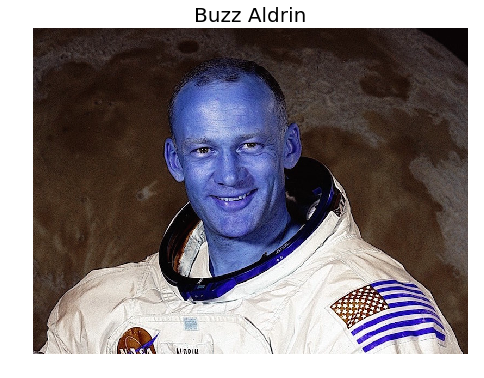

In [6]:
im_file='data/buzz_aldrin.jpg'
im=cv2.imread(im_file)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im)
ax.axis('off')
ax.set_title('Buzz Aldrin', fontsize=20)

A diferencia de la mayoría de las librerías, en OpenCV el order de los canales de color es **BGR** en vez de **RGB**.

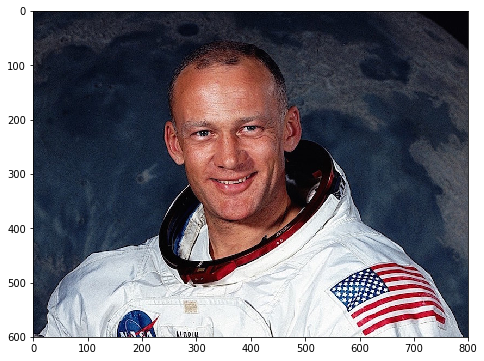

In [7]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)

In [8]:
cv2.imshow('image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

OpenCV incluye una serie de métodos para detectar objetos. Los métodos más conocidos para detectar rostros y rasgos faciales se llama Haar cascadades 

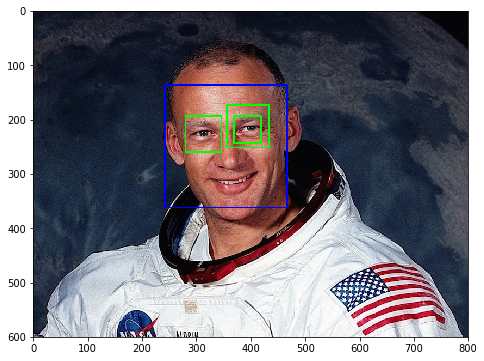

In [23]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

im_bgr = im.copy()
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(im_gray, scaleFactor=1.3, minNeighbors=5)
for (x,y,w,h) in faces:
    cv2.rectangle(im_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = im_gray[y:y+h, x:x+w]
    roi_color = im_bgr[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3, minSize=(10,10), maxSize=(120,120))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im_rgb)

#cv2.imshow('image',im_bgr)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
